Does handedness affect batting average ?
* In this notebook we are answering the question "Does handedness affect batting average?" to tackle a question such as this, we performed several tasks. 

In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as stats

In [2]:
#import Master csv File
masterfile = './Data/Master.csv'
master_df = pd.read_csv(masterfile)


small_df = master_df[['playerID','bats', 'throws']]
small_df = small_df.dropna(axis=0, how='any')

#Show DataFrame
small_df.head()

,playerID,bats,throws
0,aardsda01,R,R
1,aaronha01,R,R
2,aaronto01,R,R
3,aasedo01,R,R
4,abadan01,L,L


In [3]:
#Count the amount of "Right", "Left", and "Both" handed batters 
small_df['bats'].value_counts()

R    11544
L     4836
B     1151
Name: bats, dtype: int64

In [4]:
#Count the amount of "Right", "Left", and "Both" handed throwers
small_df['throws'].value_counts()

R    14004
L     3527
Name: throws, dtype: int64

In [5]:
#Import Batting File
battingfile = './Data/Batting.csv'
batting_df = pd.read_csv(battingfile)

#Show DataFrame
batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [6]:
#Pull specific columns ('playerID', 'AB', 'R', 'H') and store them in a seperate DataFrame
batfile = batting_df[['playerID', 'AB', 'R', 'H']]

#Group by 'playerID' and calculate mean for each player('playerID')
batfile = batfile.groupby('playerID').mean()

#Show DataFrame
batfile.head()

,AB,R,H
playerID,,,
aardsda01,0.444444,0.000000,0.000000
aaronha01,537.565217,94.521739,163.956522
aaronto01,134.857143,14.571429,30.857143
aasedo01,2.500000,0.000000,0.000000
abadan01,7.000000,0.333333,0.666667


In [7]:
#Combine the Master csv file and the batfile csv into one DataFrame
combined_df = pd.merge(small_df, batfile, on = 'playerID', how = 'right')

#Show DataFrame
combined_df.head()

,playerID,bats,throws,AB,R,H
0,aardsda01,R,R,0.444444,0.000000,0.000000
1,aaronha01,R,R,537.565217,94.521739,163.956522
2,aaronto01,R,R,134.857143,14.571429,30.857143
3,aasedo01,R,R,2.500000,0.000000,0.000000
4,abadan01,L,L,7.000000,0.333333,0.666667


In [8]:
#Drop the rows that have Nan entry
combined_df = combined_df.dropna(axis=0, how='any')

#Show DataFrame
combined_df.head()

,playerID,bats,throws,AB,R,H
0,aardsda01,R,R,0.444444,0.000000,0.000000
1,aaronha01,R,R,537.565217,94.521739,163.956522
2,aaronto01,R,R,134.857143,14.571429,30.857143
3,aasedo01,R,R,2.500000,0.000000,0.000000
4,abadan01,L,L,7.000000,0.333333,0.666667


In [9]:
#Set restrictions so that we do not get an Error when dividing by '0'
combined_df = combined_df.loc[combined_df['AB']>0, :]
combined_df = combined_df.loc[combined_df['H']>0, :]

In [10]:
#Calculate the Batting Average, divide Hits('H') by At-bat('AB') 
combined_df["batting average"] = combined_df['H']/combined_df['AB']

#Calculate Productivity, divide Runs('R') by Hits('H')
combined_df["Productivity"] = combined_df['R']/combined_df['H']

#Show DataFrame
combined_df.head()

,playerID,bats,throws,AB,R,H,batting average,Productivity
1,aaronha01,R,R,537.565217,94.521739,163.956522,0.304998,0.576505
2,aaronto01,R,R,134.857143,14.571429,30.857143,0.228814,0.472222
4,abadan01,L,L,7.000000,0.333333,0.666667,0.095238,0.500000
5,abadfe01,L,L,1.333333,0.000000,0.166667,0.125000,0.000000
6,abadijo01,R,R,24.500000,2.000000,5.500000,0.224490,0.363636


In [11]:
#View statistical details of our combined DataFrame
combined_df.describe()

,AB,R,H,batting average,Productivity
count,13365.000000,13365.000000,13365.000000,13365.000000,13365.000000
mean,113.420922,14.329990,28.706082,0.222719,0.496365
std,129.484426,19.078400,36.199424,0.097115,0.424931
min,0.076923,0.000000,0.058824,0.015873,0.000000
25%,15.500000,1.000000,2.500000,0.168831,0.363636
50%,52.200000,5.000000,11.000000,0.229630,0.472332
75%,179.000000,21.000000,44.727273,0.262443,0.568846
max,603.666667,120.714286,192.000000,1.000000,25.000000


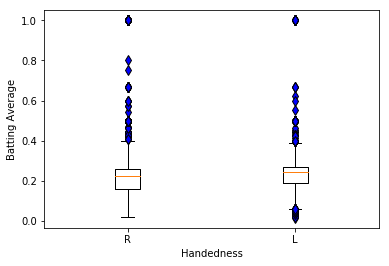

In [16]:
#Create a list to hold Right('R') and Left('L')
hands = ['R', 'L']

batting_average = [[] for i in hands]
productivity = [[] for i in hands]

for hand in hands:

    temp_df = combined_df.loc[combined_df['bats'] == hand,:]
    
    #Iterate through the DataFrame and return 
    for index, row in temp_df.iterrows():
        batting_average[hands.index(hand)].append(row["batting average"])
        productivity[hands.index(hand)].append(row["Productivity"])
        
        
        

flierprops = {'marker': 'd','markerfacecolor': 'blue','markersize':7}



plt.boxplot(batting_average,labels = hands,flierprops = flierprops)

#label the plot
plt.xlabel("Handedness")
plt.ylabel("Batting Average")
plt.show()

In [13]:
#Calculate the T-test for batting_average
#Batting Average = Hits 'H' / At-Bats 'AB'
stats.ttest_ind(batting_average[0],batting_average[1],equal_var = False)

Ttest_indResult(statistic=-8.587512468688194, pvalue=1.049549016688599e-17)

T-test Results
* Our negative t-value means that 

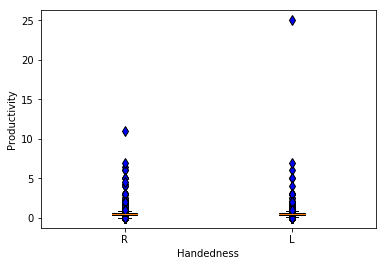

In [17]:
#Create a boxplot 
plt.boxplot(productivity,labels = hands,flierprops = flierprops)

#label the plot
plt.xlabel("Handedness")
plt.ylabel("Productivity")
plt.show()

In [15]:
#Calculate T-test for Productivity
#Productivity = Runs 'R' / Hits 'H'
stats.ttest_ind(productivity[0],productivity[1],equal_var = False)

Ttest_indResult(statistic=-1.9561856640395268, pvalue=0.05049356242682763)

T-test results
* 